In [12]:
from pathlib import Path
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

# Localisation du fichier CSV
current_dir = Path().resolve()
project_root = current_dir.parent
data_path = project_root / "Data" / "Dataset of weighing station temperature measurements.csv"

print("Fichier CSV :", data_path)

# IMPORTANT : le fichier est séparé par des ';'
df = pd.read_csv(data_path, sep=";")

# Aperçu
display(df.head())
print(df.columns)


Fichier CSV : C:\Users\slaro\Desktop\Analyse_donnees_TP_TT\Data\Dataset of weighing station temperature measurements.csv


,Time,Outdoor temperature [deg. C],Outdoor relative humidity [%],T[degC]-Low-S1,T[degC]-Low-S2,T[degC]-Low-S3,T[degC]-Low-S4,T[degC]-Low-S5,T[degC]-Low-S6,T[degC]-Low-S7,...,T[degC]-Top-S20,T[degC]-Top-S21,T[degC]-Top-S22,T[degC]-Top-S23,T[degC]-Top-S24,T[degC]-Top-S25,T[degC]-Top-S26,T[degC]-Top-S27,T[degC]-Top-S28,T[degC]-Top-S29
0,2023-12-21 12:10,-3.883333,42.333333,33.522705,31.560910,34.793104,30.900530,NaN,22.404998,33.093054,...,8.361203,14.383413,8.152400,11.794627,0.243417,-0.262979,0.135317,0.686731,-0.371935,0.519350
1,2023-12-21 12:12,-3.880000,42.400000,33.803224,31.345106,35.152043,30.010469,NaN,20.637749,32.470107,...,7.510757,13.676871,8.008640,11.373162,-0.190435,-0.432580,-0.057492,0.495419,-0.384059,0.387556
2,2023-12-21 12:14,-3.876667,42.466667,33.184819,30.096022,32.640345,28.717193,NaN,19.941584,31.789397,...,8.691577,14.843329,8.229449,11.859397,0.781753,-0.493263,0.411335,1.067664,-0.335581,0.614961
3,2023-12-21 12:16,-3.873333,42.533333,33.534186,31.024726,33.257158,29.600942,NaN,21.224968,31.869777,...,10.831607,16.998668,10.048923,13.826938,2.526770,0.913081,2.549498,2.620016,-0.178265,1.800967
4,2023-12-21 12:18,-3.870000,42.600000,34.166208,32.214443,34.975090,31.081814,NaN,22.437115,32.675023,...,10.396931,16.572248,9.798096,13.483880,2.187975,0.471456,1.553302,2.059153,-0.190359,1.612425


Index(['Time', 'Outdoor temperature [deg. C]', 'Outdoor relative humidity [%]',
       'T[degC]-Low-S1', 'T[degC]-Low-S2', 'T[degC]-Low-S3', 'T[degC]-Low-S4',
       'T[degC]-Low-S5', 'T[degC]-Low-S6', 'T[degC]-Low-S7', 'T[degC]-Low-S8',
       'T[degC]-Low-S9', 'T[degC]-Low-S10', 'T[degC]-Low-S11',
       'T[degC]-Low-S12', 'T[degC]-Low-S13', 'T[degC]-Low-S14',
       'T[degC]-Low-S15', 'T[degC]-Low-S16', 'T[degC]-Low-S17',
       'T[degC]-Low-S18', 'T[degC]-Low-S19', 'T[degC]-Low-S20',
       'T[degC]-Low-S21', 'T[degC]-Low-S22', 'T[degC]-Low-S23',
       'T[degC]-Low-S24', 'T[degC]-Low-S25', 'T[degC]-Low-S26',
       'T[degC]-Low-S27', 'T[degC]-Low-S28', 'T[degC]-Low-S29',
       'T[degC]-Mid-S1', 'T[degC]-Mid-S2', 'T[degC]-Mid-S3', 'T[degC]-Mid-S4',
       'T[degC]-Mid-S5', 'T[degC]-Mid-S6', 'T[degC]-Mid-S7', 'T[degC]-Mid-S8',
       'T[degC]-Mid-S9', 'T[degC]-Mid-S10', 'T[degC]-Mid-S11',
       'T[degC]-Mid-S12', 'T[degC]-Mid-S13', 'T[degC]-Mid-S14',
       'T[degC]-Mid-S15', 'T[d

In [13]:
# On convertit la colonne Time en datetime et on la met en index
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time').sort_index()

df.head()


,Outdoor temperature [deg. C],Outdoor relative humidity [%],T[degC]-Low-S1,T[degC]-Low-S2,T[degC]-Low-S3,T[degC]-Low-S4,T[degC]-Low-S5,T[degC]-Low-S6,T[degC]-Low-S7,T[degC]-Low-S8,...,T[degC]-Top-S20,T[degC]-Top-S21,T[degC]-Top-S22,T[degC]-Top-S23,T[degC]-Top-S24,T[degC]-Top-S25,T[degC]-Top-S26,T[degC]-Top-S27,T[degC]-Top-S28,T[degC]-Top-S29
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-21 12:10:00,-3.883333,42.333333,33.522705,31.560910,34.793104,30.900530,NaN,22.404998,33.093054,NaN,...,8.361203,14.383413,8.152400,11.794627,0.243417,-0.262979,0.135317,0.686731,-0.371935,0.519350
2023-12-21 12:12:00,-3.880000,42.400000,33.803224,31.345106,35.152043,30.010469,NaN,20.637749,32.470107,NaN,...,7.510757,13.676871,8.008640,11.373162,-0.190435,-0.432580,-0.057492,0.495419,-0.384059,0.387556
2023-12-21 12:14:00,-3.876667,42.466667,33.184819,30.096022,32.640345,28.717193,NaN,19.941584,31.789397,NaN,...,8.691577,14.843329,8.229449,11.859397,0.781753,-0.493263,0.411335,1.067664,-0.335581,0.614961
2023-12-21 12:16:00,-3.873333,42.533333,33.534186,31.024726,33.257158,29.600942,NaN,21.224968,31.869777,NaN,...,10.831607,16.998668,10.048923,13.826938,2.526770,0.913081,2.549498,2.620016,-0.178265,1.800967
2023-12-21 12:18:00,-3.870000,42.600000,34.166208,32.214443,34.975090,31.081814,NaN,22.437115,32.675023,NaN,...,10.396931,16.572248,9.798096,13.483880,2.187975,0.471456,1.553302,2.059153,-0.190359,1.612425


In [14]:
# Colonnes de température à l'intérieur du puits
low_cols = [c for c in df.columns if "Low" in c]
mid_cols = [c for c in df.columns if "Mid" in c]
top_cols = [c for c in df.columns if "Top" in c]

# On les trie par numéro de capteur S1, S2, ... 
def sort_by_sensor(col_list):
    return sorted(col_list, key=lambda x: int(x.split("-S")[1]))

low_cols = sort_by_sensor(low_cols)
mid_cols = sort_by_sensor(mid_cols)
top_cols = sort_by_sensor(top_cols)

# P6 : données valides seulement à partir du 26 janvier 2024 
date_debut_P6 = pd.to_datetime("2024-01-26")

p6_sensors = [24, 25, 26, 27, 28, 29]

p6_low_cols = [low_cols[s-1] for s in p6_sensors]
p6_mid_cols = [mid_cols[s-1] for s in p6_sensors]
p6_top_cols = [top_cols[s-1] for s in p6_sensors]

p6_all_cols = p6_low_cols + p6_mid_cols + p6_top_cols

# met à NaN toutes les valeurs de P6 avant le 26 janvier
df.loc[df.index < date_debut_P6, p6_all_cols] = np.nan



print("Nb capteurs LOW :", len(low_cols))
print("Nb capteurs MID :", len(mid_cols))
print("Nb capteurs TOP :", len(top_cols))

print("\nExemples LOW :", low_cols[:29])
print("Exemples MID :", mid_cols[:5])
print("Exemples TOP :", top_cols[:5])


Nb capteurs LOW : 29
Nb capteurs MID : 29
Nb capteurs TOP : 29

Exemples LOW : ['T[degC]-Low-S1', 'T[degC]-Low-S2', 'T[degC]-Low-S3', 'T[degC]-Low-S4', 'T[degC]-Low-S5', 'T[degC]-Low-S6', 'T[degC]-Low-S7', 'T[degC]-Low-S8', 'T[degC]-Low-S9', 'T[degC]-Low-S10', 'T[degC]-Low-S11', 'T[degC]-Low-S12', 'T[degC]-Low-S13', 'T[degC]-Low-S14', 'T[degC]-Low-S15', 'T[degC]-Low-S16', 'T[degC]-Low-S17', 'T[degC]-Low-S18', 'T[degC]-Low-S19', 'T[degC]-Low-S20', 'T[degC]-Low-S21', 'T[degC]-Low-S22', 'T[degC]-Low-S23', 'T[degC]-Low-S24', 'T[degC]-Low-S25', 'T[degC]-Low-S26', 'T[degC]-Low-S27', 'T[degC]-Low-S28', 'T[degC]-Low-S29']
Exemples MID : ['T[degC]-Mid-S1', 'T[degC]-Mid-S2', 'T[degC]-Mid-S3', 'T[degC]-Mid-S4', 'T[degC]-Mid-S5']
Exemples TOP : ['T[degC]-Top-S1', 'T[degC]-Top-S2', 'T[degC]-Top-S3', 'T[degC]-Top-S4', 'T[degC]-Top-S5']


T_puits moyen : 21.19 °C
température moyenne TOP [°C]: 22.275960301088563
température moyenne MID [°C]: 22.512464536016385
température moyenne LOW [°C]: 19.057524914100306
température moyenne PUITS [°C]: 21.18743047601074


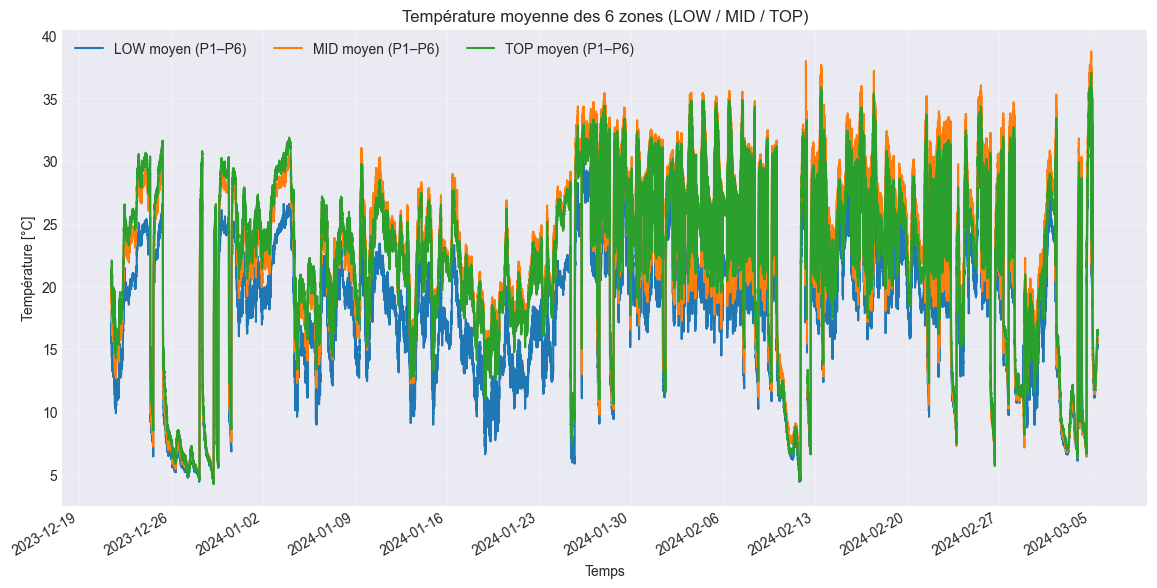

In [15]:
zones_dict = {
    "P1": [1, 2, 3, 4, 5],
    "P2": [6, 7, 8, 9, ],
    "P3": [10, 11, 12, 13],
    "P4": [14, 15, 16, 17, 18],
    "P5": [19, 20, 21, 22, 23],
    "P6": [24, 25, 26, 27, 28, 29],
}

zones_temp = {}

for zone_name, sondes in zones_dict.items():

    T_low = df[[low_cols[s-1] for s in sondes]].mean(axis=1)
    T_mid = df[[mid_cols[s-1] for s in sondes]].mean(axis=1)
    T_top = df[[top_cols[s-1] for s in sondes]].mean(axis=1)

    zones_temp[zone_name] = {
        "LOW": T_low,
        "MID": T_mid,
        "TOP": T_top,
    }
# 1) Moyenne globale LOW / MID / TOP sur toutes les zones
T_low_global = pd.concat([data["LOW"] for data in zones_temp.values()], axis=1).mean(axis=1)
T_mid_global = pd.concat([data["MID"] for data in zones_temp.values()], axis=1).mean(axis=1)
T_top_global = pd.concat([data["TOP"] for data in zones_temp.values()], axis=1).mean(axis=1)
# Moyenne sur toutes les sondes LOW, MID, TOP à chaque instant
T_puits_global = df[low_cols + mid_cols + top_cols].mean(axis=1)

# Moyenne sur toute la période
T_puits_moy = T_puits_global.mean()
print(f"T_puits moyen : {T_puits_moy:.2f} °C")



#print(T_low)
#print(zones_temp)
print("température moyenne TOP [°C]:", T_top_global.mean())
print("température moyenne MID [°C]:", T_mid_global.mean())
print("température moyenne LOW [°C]:", T_low_global.mean())  
print("température moyenne PUITS [°C]:", T_puits_moy)
# 2) Graphique : LOW/MID/TOP moyens (P1–P5)
plt.figure(figsize=(14, 7))

plt.plot(T_low_global.index, T_low_global, label="LOW moyen (P1–P6)")
plt.plot(T_mid_global.index, T_mid_global, label="MID moyen (P1–P6)")
plt.plot(T_top_global.index, T_top_global, label="TOP moyen (P1–P6)")

plt.xlabel("Temps")
plt.ylabel("Température [°C]")
plt.title("Température moyenne des 6 zones (LOW / MID / TOP)")

# Format de l’axe X (dates)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid(alpha=0.3)
plt.legend(ncol=3)
plt.show()

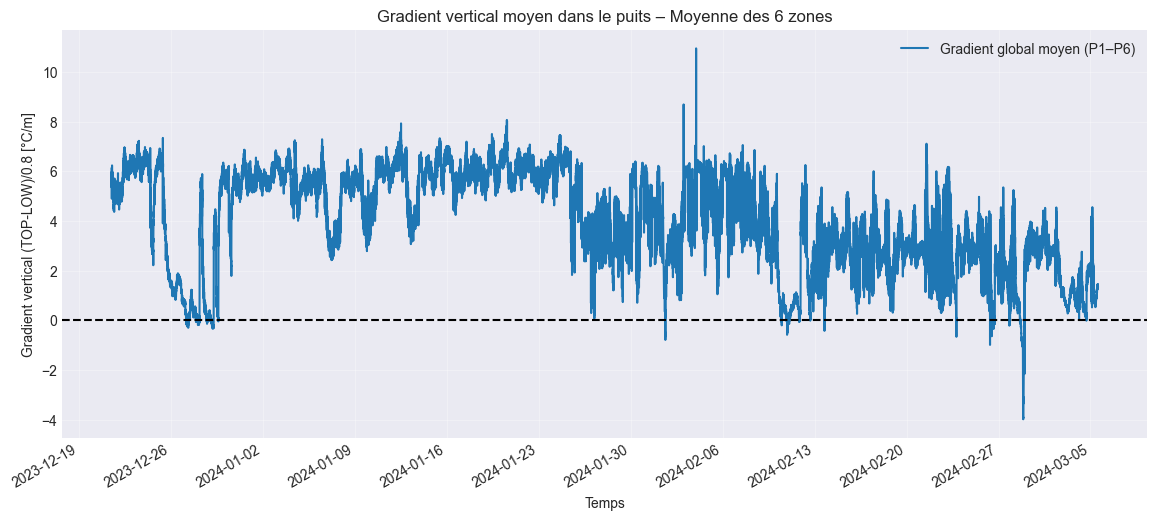

In [16]:
delta_z = 0.8  # m entre LOW et TOP

dT_global = T_top_global - T_low_global  # [°C]
grad_global = dT_global / delta_z   # [°C/m]

plt.figure(figsize=(14, 6))

plt.plot(grad_global.index, grad_global, label="Gradient global moyen (P1–P6)")

plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Temps")
plt.ylabel("Gradient vertical (TOP-LOW)/0.8 [°C/m]")
plt.title("Gradient vertical moyen dans le puits – Moyenne des 6 zones")

# Axe X en dates lisibles
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [17]:
# ΔT TOP-LOW pour tous les poteaux (S1 à S29)
dT_all = pd.DataFrame({
    f"S{i+1}": df[top_cols[i]] - df[low_cols[i]]
    for i in range(29)
})

grad_all = dT_all / delta_z  # [°C/m]

# Gradient moyen par poteau
mean_grad_par_poteau = grad_all.mean()
overall_mean_grad = grad_all.stack().mean()

print("Gradient moyen par poteau [°C/m]:\n", mean_grad_par_poteau)
print("\nGradient moyen global [°C/m]:", overall_mean_grad)


Gradient moyen par poteau [°C/m]:
 S1      1.169168
S2      4.813644
S3      9.561714
S4      3.179341
S5           NaN
S6      5.472306
S7      2.404551
S8           NaN
S9      8.820739
S10     4.705555
S11     3.379055
S12     5.163896
S13     4.766009
S14     2.579076
S15     0.667369
S16     3.376286
S17     2.234584
S18     3.800003
S19     8.786926
S20          NaN
S21     9.147953
S22     4.845366
S23    -0.413511
S24     0.206984
S25          NaN
S26     3.456490
S27    13.749464
S28   -12.636451
S29     4.456817
dtype: float64

Gradient moyen global [°C/m]: 4.115128310729607


In [18]:
threshold = 1.5  # °C

est_stratified = dT_all > threshold  # DataFrame booléen

# Fraction du temps stratifié par poteau
frac_time_par_poteau = est_stratified.mean()*100  # en pourcentage

# Fraction du temps où au moins un poteau est stratifié
frac_time_any_poteau = est_stratified.any(axis=1).mean()*100  # en pourcentage

print("Fraction du temps stratifié par poteau:\n", frac_time_par_poteau)
print("\nFraction du temps où au moins un poteau est stratifié :", frac_time_any_poteau)

Fraction du temps stratifié par poteau:
 S1     42.403049
S2     83.164964
S3     86.878330
S4     77.880773
S5      0.000000
S6     80.852205
S7     78.522795
S8      0.000000
S9     65.439979
S10    85.163188
S11    93.137581
S12    84.745041
S13    21.536412
S14    73.140542
S15    37.137359
S16    69.423475
S17    58.647869
S18    48.284858
S19    92.181024
S20     0.000000
S21    88.436205
S22    85.609088
S23     3.043591
S24    14.494523
S25     0.000000
S26    18.609384
S27    19.528937
S28     7.397128
S29    18.999778
dtype: float64

Fraction du temps où au moins un poteau est stratifié : 98.56793960923623


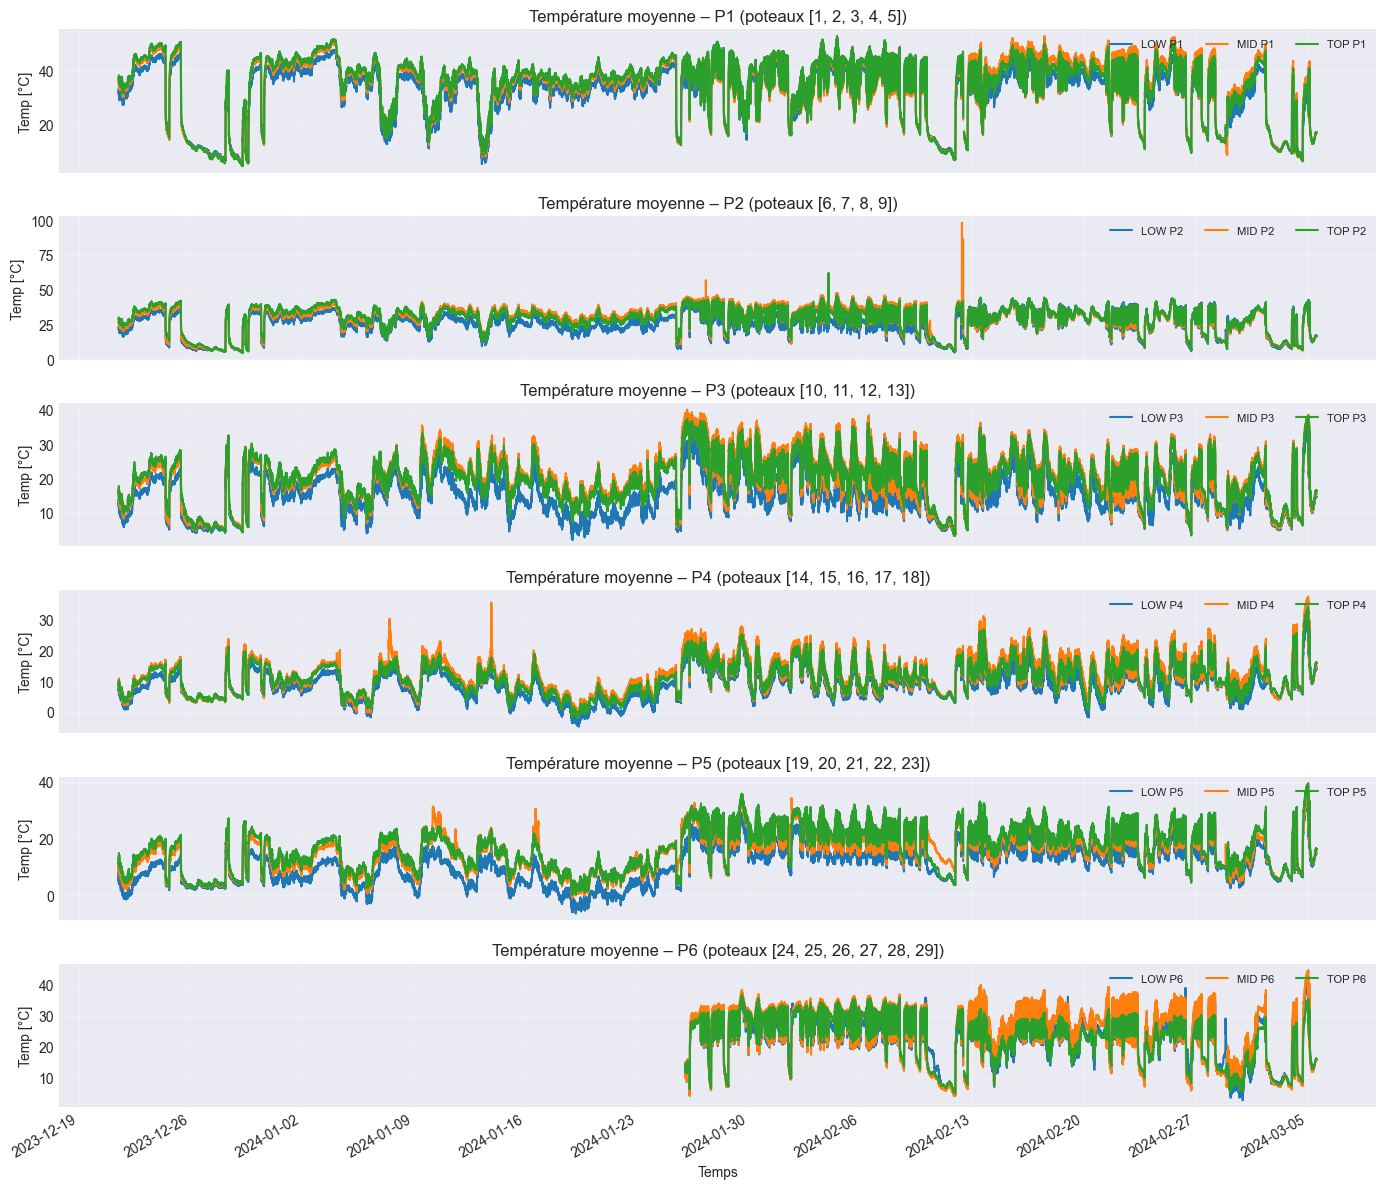

In [19]:

# Graphique stratification par zone (P1 à P6)
zones_dict = {
    "P1": [1, 2, 3, 4, 5],
    "P2": [6, 7, 8, 9],
    "P3": [10, 11, 12, 13],
    "P4": [14, 15, 16, 17, 18],
    "P5": [19, 20, 21, 22, 23],
    "P6": [24, 25, 26, 27, 28, 29],
}

def zone_levels(df, sensors):
    low = df[[low_cols[s-1] for s in sensors]].mean(axis=1)
    mid = df[[mid_cols[s-1] for s in sensors]].mean(axis=1)
    top = df[[top_cols[s-1] for s in sensors]].mean(axis=1)
    return low, mid, top

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 12), sharex=True)

for ax, (zone, sensors) in zip(axes, zones_dict.items()):
    z_low, z_mid, z_top = zone_levels(df, sensors)
    ax.plot(df.index, z_low, label=f"LOW {zone}")
    ax.plot(df.index, z_mid, label=f"MID {zone}")
    ax.plot(df.index, z_top, label=f"TOP {zone}")
    ax.set_title(f"Température moyenne – {zone} (poteaux {sensors})")
    ax.set_ylabel("Temp [°C]")
    ax.grid(True, alpha=0.3)
    ax.legend(ncol=3, fontsize=8, loc="upper right")

# Axe X plus précis (dates)
locator   = mdates.WeekdayLocator(interval=1)          # 1 tick / semaine
formatter = mdates.DateFormatter('%Y-%m-%d')           # AAAA-MM-JJ
axes[-1].xaxis.set_major_locator(locator)
axes[-1].xaxis.set_major_formatter(formatter)
axes[-1].set_xlabel("Temps")
fig.autofmt_xdate()                                    # rotation des dates

plt.tight_layout()
plt.show()


In [20]:
# Capteurs de la zone P2
sensors_P2 = [6, 7, 8, 9]

# Température MID moyenne de la zone P2 (sur tout l’historique)
T_mid_P2 = df[[mid_cols[s-1] for s in sensors_P2]].mean(axis=1)

# Filtre entre le 10 et le 13 février 2024 (inclus)
T_mid_P2_10_13 = T_mid_P2.loc["2024-02-10":"2024-02-13"]

with pd.option_context("display.max_rows", None):
    print(T_mid_P2_10_13)

Time
2024-02-10 00:00:00    40.554684
2024-02-10 00:02:00    40.370476
2024-02-10 00:04:00    32.154658
2024-02-10 00:06:00    27.388562
2024-02-10 00:08:00    35.708123
2024-02-10 00:10:00    39.029422
2024-02-10 00:12:00    39.618619
2024-02-10 00:14:00    39.948655
2024-02-10 00:16:00    38.520002
2024-02-10 00:18:00    29.268197
2024-02-10 00:20:00    29.702226
2024-02-10 00:22:00    37.377228
2024-02-10 00:24:00    39.320929
2024-02-10 00:26:00    39.918762
2024-02-10 00:28:00    40.317411
2024-02-10 00:30:00    36.527889
2024-02-10 00:32:00    28.108690
2024-02-10 00:34:00    34.703475
2024-02-10 00:36:00    38.722577
2024-02-10 00:38:00    39.876392
2024-02-10 00:40:00    40.449643
2024-02-10 00:42:00    39.797581
2024-02-10 00:44:00    30.769216
2024-02-10 00:46:00    31.217514
2024-02-10 00:48:00    37.596583
2024-02-10 00:50:00    39.122187
2024-02-10 00:52:00    40.073750
2024-02-10 00:54:00    40.164156
2024-02-10 00:56:00    35.610976
2024-02-10 00:58:00    28.635823
2024-

Les mesures de température dans le puits (29 poteaux, 3 niveaux LOW/MID/TOP, zones P1 à P6) montrent une stratification verticale nette pendant tout l’hiver. 
En moyenne sur l’ensemble des zones, le niveau LOW est toujours le plus froid, alors que MID et TOP sont plus chauds, avec souvent MID légèrement au-dessus de TOP. 

Cela s’explique par le fait que les aérothermes injectent l’air chaud à une hauteur intermédiaire (près des capteurs MID), tandis que le haut du puits, proche de la dalle et des fuites d’air extérieur, subit davantage de pertes de chaleur.
Le gradient vertical global entre LOW et TOP est en moyenne d’environ 4 °C/m, ce qui correspond à un écart typique de 3 à 4 °C entre le bas (0,40 m) et le haut (1,20 m) du puits. 

Certains poteaux atteignent des gradients moyens de l’ordre de 8–9 °C/m (zones très stratifiées), alors que d’autres présentent des gradients plus faibles ou occasionnellement négatifs (zones plus mélangées ou refroidies localement). 

Enfin, la fraction du temps où au moins un poteau est stratifié est proche de 99 %, ce qui signifie qu’il existe pratiquement en tout temps une stratification verticale significative quelque part dans le puits, avec un comportement particulier pour la zone P6 avant le 26 janvier, période où ses données ont été exclues car le chauffage était défectueux.


In [21]:

def temperature_moyenne_poteau(df, sensor_id):
    col_low = low_cols[sensor_id - 1]
    col_mid = mid_cols[sensor_id - 1]
    col_top = top_cols[sensor_id - 1]
    
    # Moyenne en hauteur (LOW, MID, TOP) pour ce poteau
    T_poteau = df[[col_low, col_mid, col_top]].mean(axis=1)
    return T_poteau

poteaux = [1, 29]
T_moy = {}

for sid in poteaux:
    T_moy[sid] = temperature_moyenne_poteau(df, sid)
    T_moy_global = T_moy[sid].mean()
    print(f"Température moyenne poteau S{sid} : {T_moy_global:.2f} °C")


Température moyenne poteau S1 : 33.40 °C
Température moyenne poteau S29 : 26.29 °C
